In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import OneHotEncoder,MinMaxScaler,StandardScaler

In [2]:
from scipy.stats import boxcox

In [3]:
from glob import glob

# Problem Statement
By using various parameters identify the price of the flats in Mumbai

# Data Gathering

In [4]:
df=pd.read_csv('Mumbai1.csv')
df.head()

,Unnamed: 0,Price,Area,Location,No. of Bedrooms,New/Resale,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children's Play Area,Clubhouse,Intercom,Landscaped Gardens,Indoor Games,Gas Connection,Jogging Track,Swimming Pool
0,0,4850000,720,Kharghar,1,0,0,1,1,1,1,0,0,0,0,0,0,0,0
1,1,4500000,600,Kharghar,1,0,1,1,1,1,1,0,1,0,0,0,0,1,1
2,2,6700000,650,Kharghar,1,0,1,1,1,1,1,1,1,1,0,0,0,1,1
3,3,4500000,650,Kharghar,1,0,0,1,1,1,1,0,0,1,1,0,0,0,0
4,4,5000000,665,Kharghar,1,0,0,1,1,1,1,0,0,1,1,0,0,0,0


# EDA

In [5]:
df.shape

(6347, 19)

In [6]:
df.isna().sum()

Unnamed: 0              0
Price                   0
Area                    0
Location                0
No. of Bedrooms         0
New/Resale              0
Gymnasium               0
Lift Available          0
Car Parking             0
Maintenance Staff       0
24x7 Security           0
Children's Play Area    0
Clubhouse               0
Intercom                0
Landscaped Gardens      0
Indoor Games            0
Gas Connection          0
Jogging Track           0
Swimming Pool           0
dtype: int64

In [7]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6347 entries, 0 to 6346
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Price                 6347 non-null   int64 
 1   Area                  6347 non-null   int64 
 2   Location              6347 non-null   object
 3   No. of Bedrooms       6347 non-null   int64 
 4   New/Resale            6347 non-null   int64 
 5   Gymnasium             6347 non-null   int64 
 6   Lift Available        6347 non-null   int64 
 7   Car Parking           6347 non-null   int64 
 8   Maintenance Staff     6347 non-null   int64 
 9   24x7 Security         6347 non-null   int64 
 10  Children's Play Area  6347 non-null   int64 
 11  Clubhouse             6347 non-null   int64 
 12  Intercom              6347 non-null   int64 
 13  Landscaped Gardens    6347 non-null   int64 
 14  Indoor Games          6347 non-null   int64 
 15  Gas Connection        6347 non-null   

In [9]:
df.describe()

,Price,Area,No. of Bedrooms,New/Resale,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children's Play Area,Clubhouse,Intercom,Landscaped Gardens,Indoor Games,Gas Connection,Jogging Track,Swimming Pool
count,6.347000e+03,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000
mean,1.515401e+07,1004.327084,1.910036,0.341736,0.581377,0.801481,0.562943,0.281393,0.562943,0.559319,0.496297,0.484796,0.360643,0.219631,0.243107,0.381440,0.458327
std,2.015943e+07,556.375703,0.863304,0.474329,0.493372,0.398916,0.496061,0.449714,0.496061,0.496508,0.500026,0.499808,0.480225,0.414029,0.428993,0.485778,0.498300
min,2.000000e+06,200.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.300000e+06,650.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9.500000e+06,905.000000,2.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.750000e+07,1182.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,4.200000e+08,8511.000000,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
df.corr()

,Price,Area,No. of Bedrooms,New/Resale,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children's Play Area,Clubhouse,Intercom,Landscaped Gardens,Indoor Games,Gas Connection,Jogging Track,Swimming Pool
Price,1.000000,0.722336,0.594865,0.032428,0.098097,0.083656,0.055221,0.027604,0.045107,0.045126,0.084775,0.063060,0.082225,0.122352,0.118245,0.042325,0.123902
Area,0.722336,1.000000,0.812692,0.028197,0.198772,0.112241,0.124060,0.091590,0.110156,0.107132,0.181121,0.145060,0.117309,0.151458,0.094251,0.121099,0.209696
No. of Bedrooms,0.594865,0.812692,1.000000,0.099334,0.227887,0.104163,0.110182,0.047762,0.097672,0.113734,0.203105,0.144554,0.127684,0.175645,0.061616,0.126929,0.234695
New/Resale,0.032428,0.028197,0.099334,1.000000,0.243751,0.105422,-0.024795,-0.235167,-0.002695,0.278907,0.269434,0.232293,0.196307,0.290162,-0.029659,0.227498,0.276606
Gymnasium,0.098097,0.198772,0.227887,0.243751,1.000000,0.420770,0.332707,0.017514,0.382928,0.552648,0.756068,0.490203,0.423149,0.410831,0.098228,0.564443,0.722224
Lift Available,0.083656,0.112241,0.104163,0.105422,0.420770,1.000000,0.259843,0.039136,0.258250,0.423847,0.407903,0.425870,0.280011,0.195335,0.205629,0.327393,0.341265
Car Parking,0.055221,0.124060,0.110182,-0.024795,0.332707,0.259843,1.000000,0.513232,0.805328,0.087365,0.282532,0.110477,0.417677,0.281009,-0.101906,0.467630,0.284575
Maintenance Staff,0.027604,0.091590,0.047762,-0.235167,0.017514,0.039136,0.513232,1.000000,0.477914,-0.190507,-0.041616,-0.088927,0.115207,0.026861,-0.111239,-0.011001,-0.078456
24x7 Security,0.045107,0.110156,0.097672,-0.002695,0.382928,0.258250,0.805328,0.477914,1.000000,0.141747,0.332720,0.151153,0.436198,0.319371,-0.101166,0.539561,0.332387
Children's Play Area,0.045126,0.107132,0.113734,0.278907,0.552648,0.423847,0.087365,-0.190507,0.141747,1.000000,0.603074,0.585449,0.432697,0.417242,0.187151,0.527821,0.592932


<AxesSubplot:>

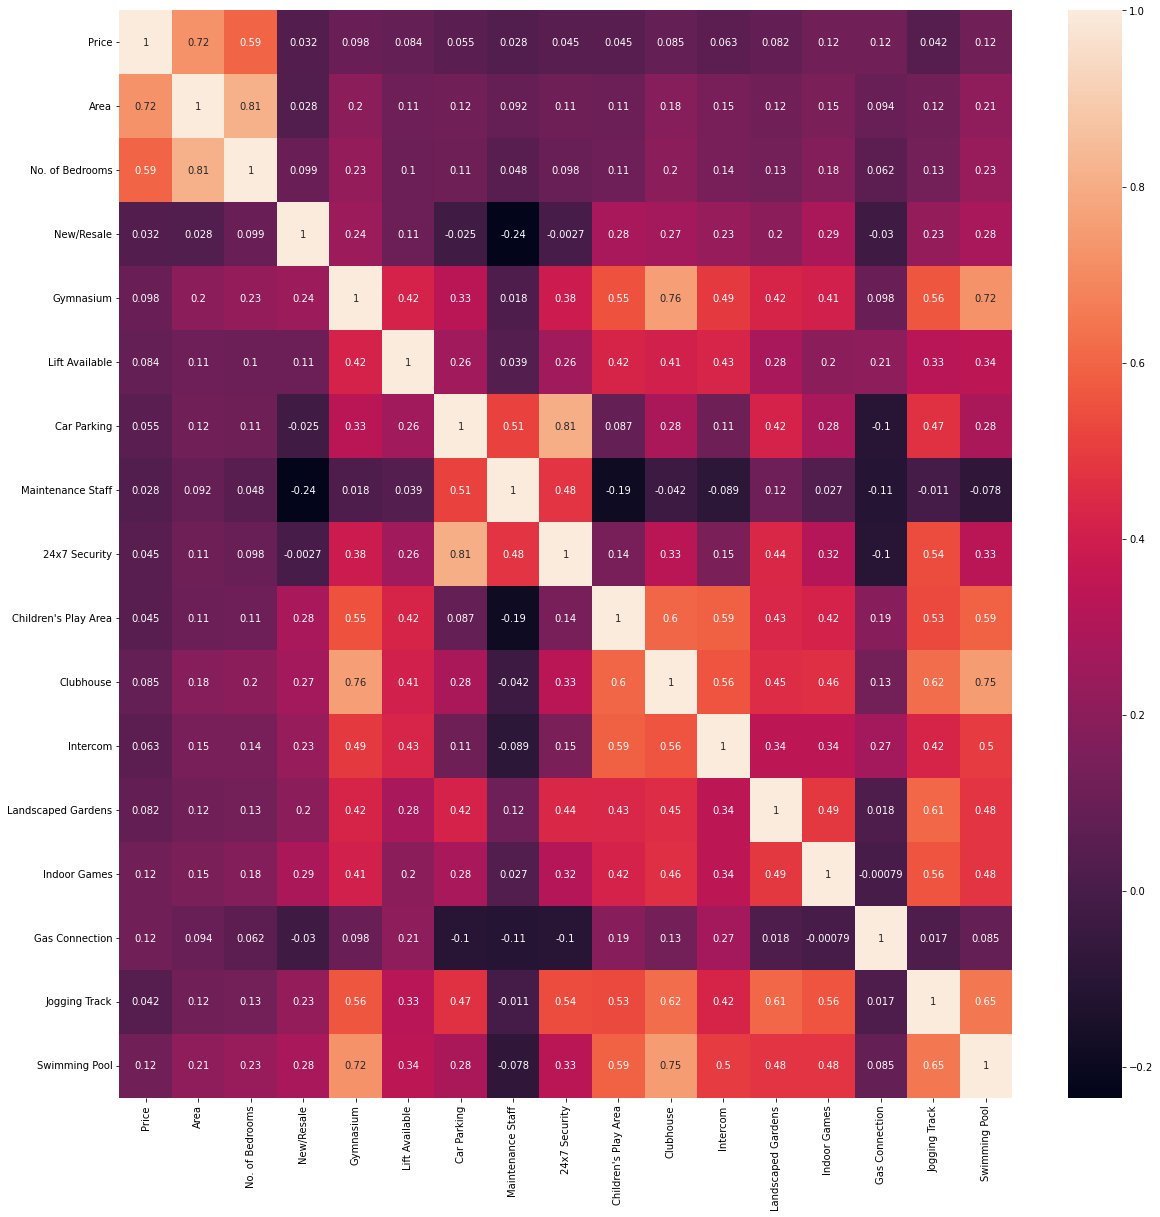

In [11]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:>

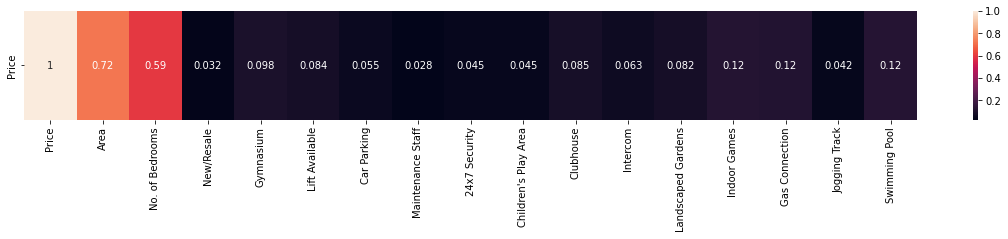

In [12]:
#Here we can see that how many features are correlated with the target column 
plt.figure(figsize=(20,2))
sns.heatmap(df.corr().head(1),annot=True)

<AxesSubplot:>

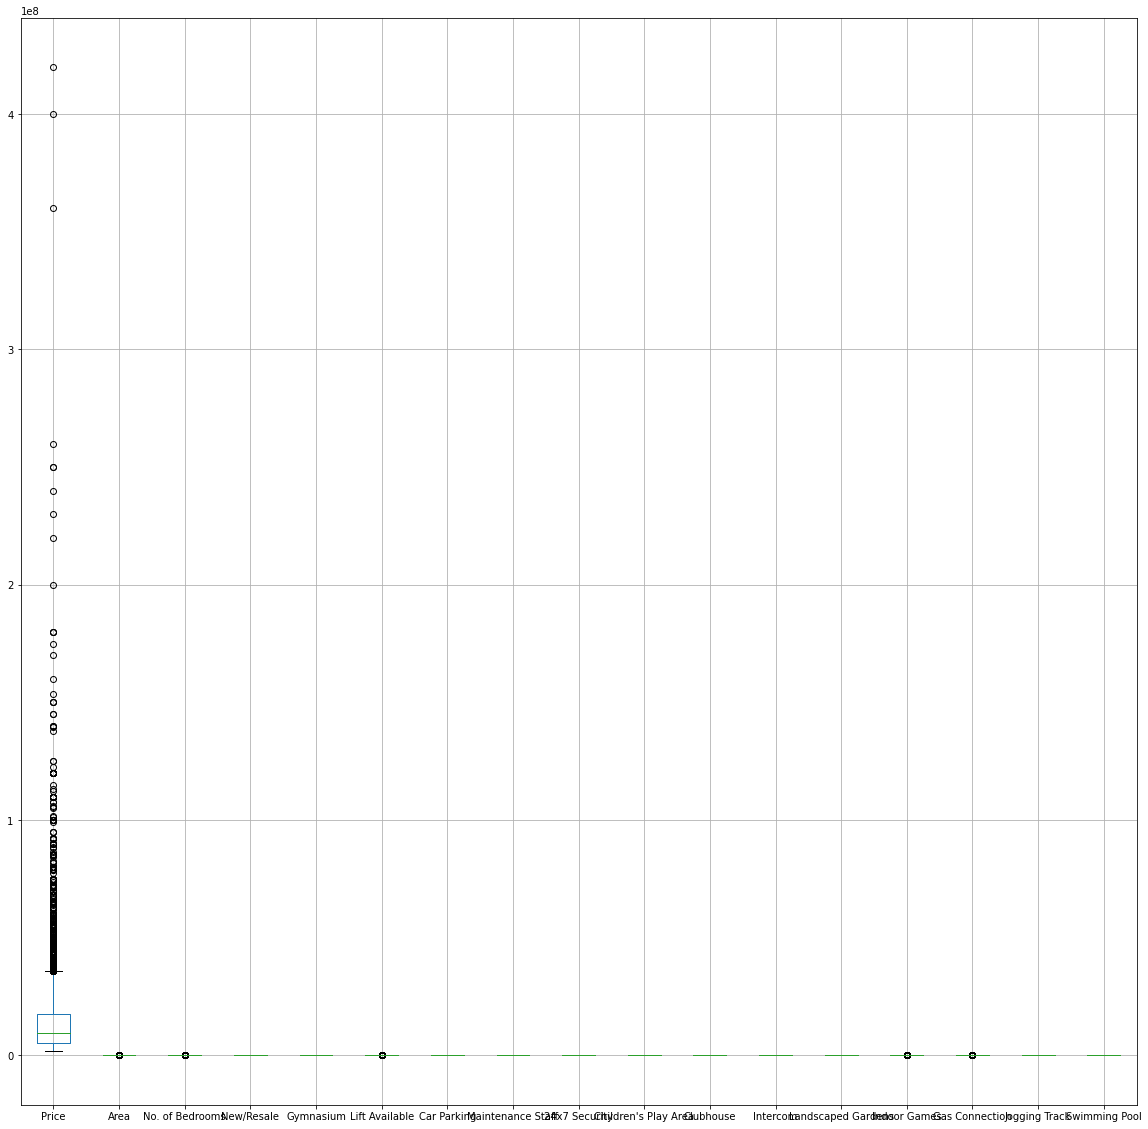

In [13]:
plt.figure(figsize=(20,20))
df.boxplot()

In [14]:
df['Location'].value_counts().head(10)

Kharghar          533
Thane West        418
Mira Road East    390
Ulwe              319
Borivali West     176
Kalyan West       176
Nala Sopara       172
Malad West        163
Andheri West      161
Powai             141
Name: Location, dtype: int64

In [15]:
df1=df.loc[(df['Location']=='Kharghar')|(df['Location']=='Thane West')|(df['Location']=='Mira Road East')|(df['Location']=='Ulwe')|
      (df['Location']=='Borivali West')|(df['Location']=='Kalyan West')|(df['Location']=='Nala Sopara')|(df['Location']=='Malad West')|
      (df['Location']=='Andheri West')|(df['Location']=='Powai')]

In [16]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2649 entries, 0 to 6344
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Price                 2649 non-null   int64 
 1   Area                  2649 non-null   int64 
 2   Location              2649 non-null   object
 3   No. of Bedrooms       2649 non-null   int64 
 4   New/Resale            2649 non-null   int64 
 5   Gymnasium             2649 non-null   int64 
 6   Lift Available        2649 non-null   int64 
 7   Car Parking           2649 non-null   int64 
 8   Maintenance Staff     2649 non-null   int64 
 9   24x7 Security         2649 non-null   int64 
 10  Children's Play Area  2649 non-null   int64 
 11  Clubhouse             2649 non-null   int64 
 12  Intercom              2649 non-null   int64 
 13  Landscaped Gardens    2649 non-null   int64 
 14  Indoor Games          2649 non-null   int64 
 15  Gas Connection        2649 non-null   

<AxesSubplot:>

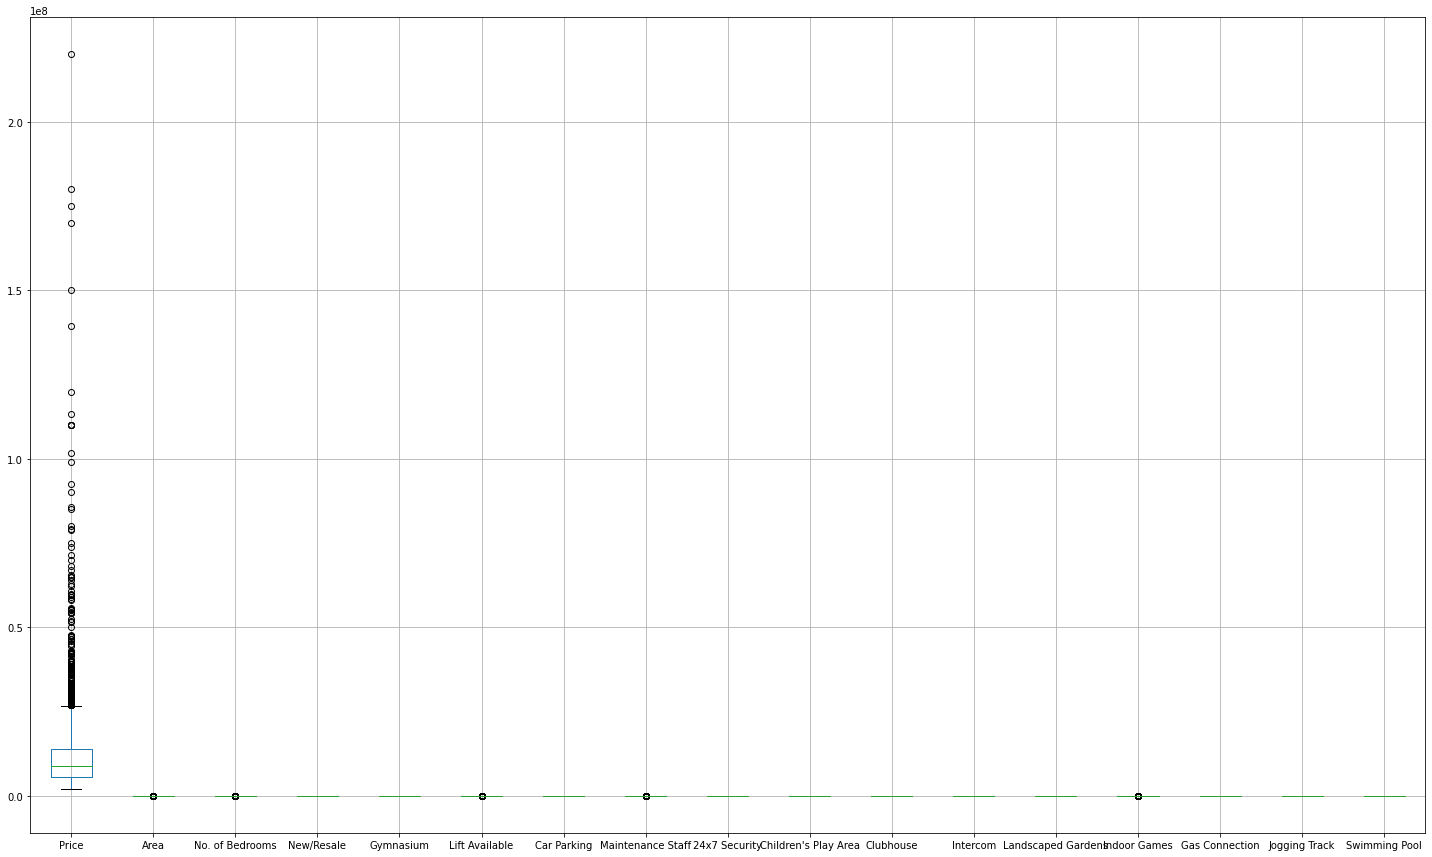

In [17]:
plt.figure(figsize=(25,15))
df1.boxplot()
### Here we see that there are huge amount of outliers are present in the price column

### Outliers Removing

### Z-Score

In [18]:
mean=df1['Price'].mean()
std=df1['Price'].std()

In [19]:
mean+3*std

54109656.11466146

In [20]:
mean-3*std

-29393490.807753198

In [21]:
(75632292.70734785-mean)/std

4.5464784779441

In [22]:
(-45324265.33284022-mean)/std

-4.144683172711237

In [23]:
from scipy.stats import zscore

In [24]:
zscore(df1['Price'])

0      -0.539584
1      -0.564738
2      -0.406630
3      -0.564738
4      -0.528804
          ...   
6337   -0.111975
6340   -0.370697
6341   -0.385070
6343    0.153933
6344    0.153933
Name: Price, Length: 2649, dtype: float64

In [25]:
df1.loc[zscore(df1['Price'])>3]

,Price,Area,Location,No. of Bedrooms,New/Resale,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children's Play Area,Clubhouse,Intercom,Landscaped Gardens,Indoor Games,Gas Connection,Jogging Track,Swimming Pool
287,90000000,5245,Thane West,5,1,1,1,1,0,0,1,1,1,1,1,1,1,1
764,175000000,1903,Thane West,4,0,1,1,1,0,1,1,0,0,1,1,0,0,1
919,110000000,3300,Andheri West,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1011,55000000,1950,Andheri West,3,1,1,1,1,1,1,1,1,1,1,1,0,1,1
1190,220000000,7600,Andheri West,5,0,1,1,0,0,0,1,1,1,0,0,1,0,1
1466,65000000,2450,Andheri West,4,0,1,1,1,1,1,1,1,0,1,1,1,1,1
1619,180000000,2110,Powai,3,0,1,1,1,1,1,1,1,1,1,1,0,0,1
1672,170000000,2963,Mira Road East,4,0,1,1,1,1,1,1,1,1,1,1,0,0,1
1707,65000000,1600,Andheri West,4,0,1,1,1,0,1,0,0,0,1,0,1,0,0
1708,110000000,2590,Andheri West,3,0,1,1,1,0,1,1,1,0,1,0,1,1,1


### IQR-Inter Quartile Range

In [26]:
q1=df1['Price'].quantile(0.25)
q2=df1['Price'].quantile(0.5)
q3=df1['Price'].quantile(0.75)
iqr=q3-q1
upper_tail=q3+1.5*iqr
lower_tail=q1-1.5*iqr
print("Upper Tail:-",upper_tail)
print("Lower Tail:-",lower_tail)


Upper Tail:- 26750000.0
Lower Tail:- -7250000.0


In [27]:
df1.loc[(df['Price']>upper_tail)]

,Price,Area,Location,No. of Bedrooms,New/Resale,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children's Play Area,Clubhouse,Intercom,Landscaped Gardens,Indoor Games,Gas Connection,Jogging Track,Swimming Pool
23,28000000,2470,Kharghar,4,0,1,1,1,1,1,1,1,1,1,1,1,1,1
24,40000000,2100,Kharghar,4,0,0,1,1,1,1,0,0,1,0,0,0,0,0
53,40000000,2100,Kharghar,4,0,1,1,1,1,1,1,1,1,0,0,0,0,1
214,33500000,1785,Borivali West,3,1,1,1,1,1,1,1,1,1,1,1,0,1,1
224,38600000,2030,Borivali West,3,1,1,1,1,1,1,1,1,1,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6097,80000000,2590,Andheri West,5,0,0,1,0,0,0,0,0,1,0,0,0,0,0
6098,29700000,2015,Thane West,3,0,1,1,1,0,1,1,1,1,0,0,0,1,1
6099,40000000,1295,Andheri West,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6254,30000000,1815,Malad West,3,0,0,1,1,1,0,1,1,0,1,0,0,0,0


In [28]:
df1.loc[(df['Price']>upper_tail),'Price']=upper_tail

<AxesSubplot:>

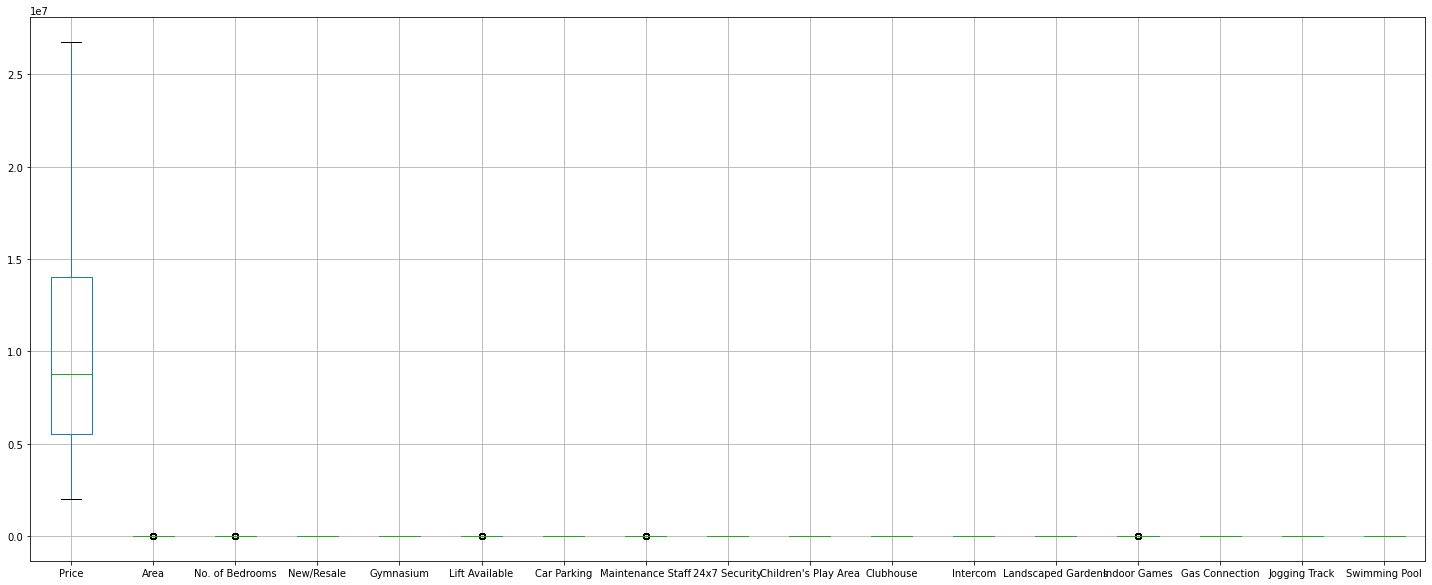

In [29]:
plt.figure(figsize=(25,10))
df1.boxplot()

In [30]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2649 entries, 0 to 6344
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Price                 2649 non-null   int64 
 1   Area                  2649 non-null   int64 
 2   Location              2649 non-null   object
 3   No. of Bedrooms       2649 non-null   int64 
 4   New/Resale            2649 non-null   int64 
 5   Gymnasium             2649 non-null   int64 
 6   Lift Available        2649 non-null   int64 
 7   Car Parking           2649 non-null   int64 
 8   Maintenance Staff     2649 non-null   int64 
 9   24x7 Security         2649 non-null   int64 
 10  Children's Play Area  2649 non-null   int64 
 11  Clubhouse             2649 non-null   int64 
 12  Intercom              2649 non-null   int64 
 13  Landscaped Gardens    2649 non-null   int64 
 14  Indoor Games          2649 non-null   int64 
 15  Gas Connection        2649 non-null   

In [31]:
df1=pd.get_dummies(df1,columns=['Location'])

In [32]:
df1.head()

,Price,Area,No. of Bedrooms,New/Resale,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children's Play Area,...,Location_Andheri West,Location_Borivali West,Location_Kalyan West,Location_Kharghar,Location_Malad West,Location_Mira Road East,Location_Nala Sopara,Location_Powai,Location_Thane West,Location_Ulwe
0,4850000,720,1,0,0,1,1,1,1,0,...,0,0,0,1,0,0,0,0,0,0
1,4500000,600,1,0,1,1,1,1,1,0,...,0,0,0,1,0,0,0,0,0,0
2,6700000,650,1,0,1,1,1,1,1,1,...,0,0,0,1,0,0,0,0,0,0
3,4500000,650,1,0,0,1,1,1,1,0,...,0,0,0,1,0,0,0,0,0,0
4,5000000,665,1,0,0,1,1,1,1,0,...,0,0,0,1,0,0,0,0,0,0


## Dividing the data 

In [33]:
x=df1.drop('Price',axis=1)
y=df1['Price']

In [34]:
print("Shape of independent variables:-",x.shape)
print("Shape of dependent variables:-",y.shape)

Shape of independent variables:- (2649, 26)
Shape of dependent variables:- (2649,)


<AxesSubplot:>

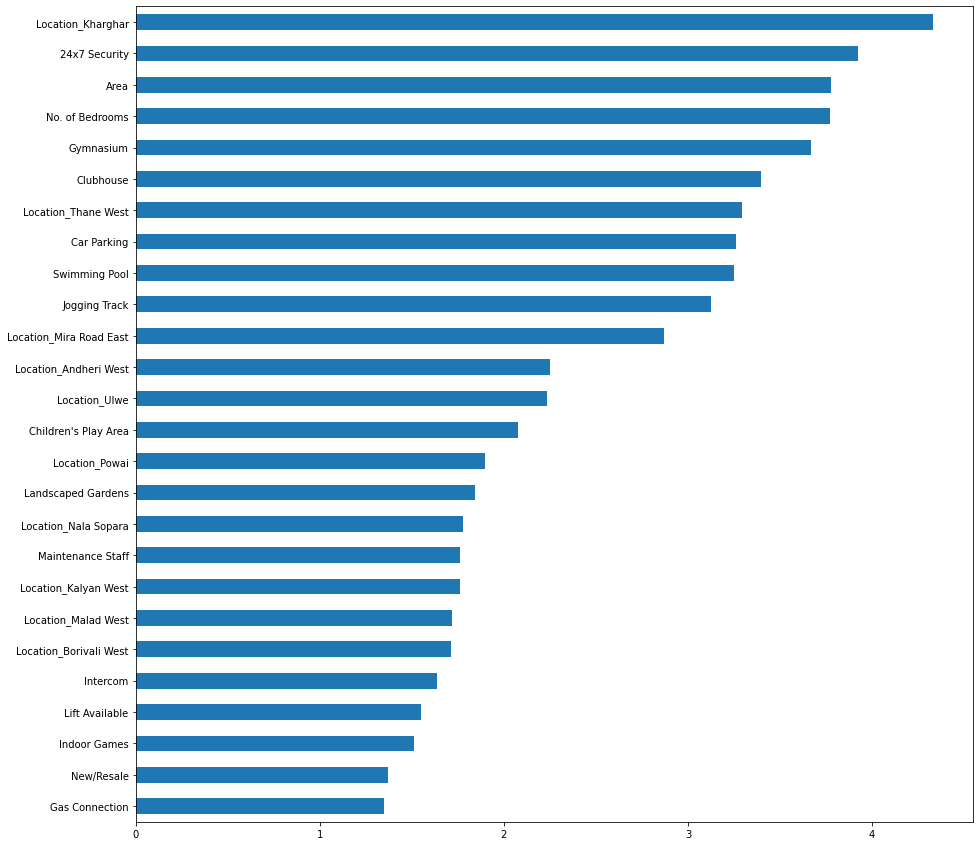

In [35]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
plt.figure(figsize=(15,15))
vif=[]
for i in range(x.shape[1]):
    v=variance_inflation_factor(x.to_numpy(),i)
    vif.append(v)
s1=pd.Series(vif,index=x.columns)
s1.sort_values().plot(kind='barh')

## Train Test split

In [36]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [37]:
print("Shape of training data",x_train.shape)
print("Shape of training data",x_test.shape)

Shape of training data (2119, 26)
Shape of training data (530, 26)


In [38]:
model=LinearRegression()

In [39]:
model.fit(x_train,y_train)

LinearRegression()

#### Evaluation on Testing data

In [40]:
y_pred=model.predict(x_test)
r2=r2_score(y_test,y_pred)
print("R-Squred value:-",r2)
adjr2=1-(((1-r2)*(x_test.shape[0]-1)))/(x_test.shape[0]-x_test.shape[1]-1)
print("Adjusted R-Squred value:-",adjr2)
mae=mean_absolute_error(y_test,y_pred)
print("Mean Squared Error:-",mae)
mse=mean_squared_error(y_test,y_pred)
print("mean Squred error:-",mse)
rmse=np.sqrt(mse)
print("Root mean squred error:-",rmse)

R-Squred value:- 0.8600878021350487
Adjusted R-Squred value:- 0.8528557600982918
Mean Squared Error:- 1906053.9052161847
mean Squred error:- 7127620998300.654
Root mean squred error:- 2669760.475829368


#### Evaluation on Traning data

In [41]:
y_pred_train=model.predict(x_train)
r2=r2_score(y_train,y_pred_train)
print("R-Squred value:-",r2)
adjr2=1-(((1-r2)*(x_train.shape[0]-1)))/(x_train.shape[0]-x_train.shape[1]-1)
print("Adjusted R-Squred value:-",adjr2)
mae=mean_absolute_error(y_train,y_pred_train)
print("Mean Squared Error:-",mae)
mse=mean_squared_error(y_train,y_pred_train)
print("mean Squred error:-",mse)
rmse=np.sqrt(mse)
print("Root mean squred error:-",rmse)

R-Squred value:- 0.8601922400277009
Adjusted R-Squred value:- 0.8584546674850242
Mean Squared Error:- 1846959.7457994795
mean Squred error:- 6642115533303.374
Root mean squred error:- 2577230.2057253974


### Hyperparameter Tunning 

In [42]:
param={'alpha':[0.05,0.20,0.4,0.6,1,2,3,4,5,6],
      "copy_X":[1,2,3,4,5],
      "fit_intercept":[11,22,33,44]}


In [43]:
r_model=Ridge()
rscv=RandomizedSearchCV(r_model,param_distributions=param,cv=5)
rscv.fit(x_train,y_train)
rscv.best_estimator_

Ridge(alpha=0.4, copy_X=4, fit_intercept=44)

In [44]:
r_model=Ridge(alpha=0.4)
r_model.fit(x_train,y_train)
y_pred=r_model.predict(x_test)
r2=r2_score(y_test,y_pred)
print("R-Squred value:-",r2)
adjr2=1-(((1-r2)*(x_test.shape[0]-1)))/(x_test.shape[0]-x_test.shape[1]-1)
print("Adjusted R-Squred value:-",adjr2)
mae=mean_absolute_error(y_test,y_pred)
print("Mean Squared Error:-",mae)
mse=mean_squared_error(y_test,y_pred)
print("mean Squred error:-",mse)
rmse=np.sqrt(mse)
print("Root mean squred error:-",rmse)

R-Squred value:- 0.8601050598946238
Adjusted R-Squred value:- 0.8528739099090576
Mean Squared Error:- 1905455.5611042504
mean Squred error:- 7126741827138.964
Root mean squred error:- 2669595.81718637


### so we are accepting the linear regression model

In [45]:
residual=y_test-y_pred

<AxesSubplot:xlabel='Price', ylabel='Density'>

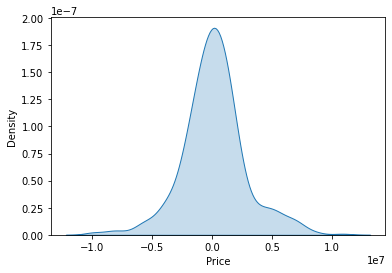

In [46]:
sns.kdeplot(residual,fill=True)

In [47]:
residual.skew()

0.1166298201079079

In [48]:
from scipy.stats import shapiro

In [49]:
_,p_value=shapiro(residual)
p_value

4.30735030976237e-10

In [50]:
x.columns

Index(['Area', 'No. of Bedrooms', 'New/Resale', 'Gymnasium', 'Lift Available',
       'Car Parking', 'Maintenance Staff', '24x7 Security',
       'Children's Play Area', 'Clubhouse', 'Intercom', 'Landscaped Gardens',
       'Indoor Games', 'Gas Connection', 'Jogging Track', 'Swimming Pool',
       'Location_Andheri West', 'Location_Borivali West',
       'Location_Kalyan West', 'Location_Kharghar', 'Location_Malad West',
       'Location_Mira Road East', 'Location_Nala Sopara', 'Location_Powai',
       'Location_Thane West', 'Location_Ulwe'],
      dtype='object')

In [51]:
Area=50000
Bedrooms=3
New_Resale=1
Gymnasium=1
Lift_Available=1
Car_Parking=0
Maintenance_Staff=1
Security=1
Play_Area=1
Clubhouse=1
Intercom=1
Landscaped_Gardens=1
Indoor_Games=1
Gas_Connection=1
Jogging_Track=1
Swimming_Pool=1
Location="Location_"+"Kharghar"

In [61]:
column=x.columns
columns={'columns':list(column)}
columns

{'columns': ['Area',
  'No. of Bedrooms',
  'New/Resale',
  'Gymnasium',
  'Lift Available',
  'Car Parking',
  'Maintenance Staff',
  '24x7 Security',
  "Children's Play Area",
  'Clubhouse',
  'Intercom',
  'Landscaped Gardens',
  'Indoor Games',
  'Gas Connection',
  'Jogging Track',
  'Swimming Pool',
  'Location_Andheri West',
  'Location_Borivali West',
  'Location_Kalyan West',
  'Location_Kharghar',
  'Location_Malad West',
  'Location_Mira Road East',
  'Location_Nala Sopara',
  'Location_Powai',
  'Location_Thane West',
  'Location_Ulwe']}

In [53]:
array=np.zeros(len(x.columns),dtype=int)

In [54]:
array[0]=Area
array[1]=Bedrooms
array[2]=New_Resale
array[3]=Gymnasium
array[4]=Lift_Available
array[5]=Car_Parking
array[6]=Maintenance_Staff
array[7]=Security
array[8]=Play_Area
array[9]=Clubhouse
array[10]=Intercom
array[11]=Landscaped_Gardens
array[12]=Indoor_Games
array[13]=Gas_Connection
array[14]=Jogging_Track 
array[15]=Swimming_Pool
Location_index=np.where(columns==Location)[0][0]
array[Location_index]=1
predict=model.predict([array])[0].round(2)
print(f"The predicted price of the house will be {predict} ₹")

The predicted price of the house will be 137403263.42 ₹


C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [55]:
import pickle
with open('mumbai_house.pkl','wb')as f:
    pickle.dump(model,f)

In [62]:
import json
with open('mumbai_house_data.json','w')as f:
    json.dump(columns,f)